## Divide and conquer approach for counting the number of inversions in an array

Recursive merge-sort approach that runs in $N \log(N)$ time

#### Read in the input file
Input is a text file with one integer per line

In [19]:
arr = []

with open("IntegerArray.txt") as file:
    for l in file.readlines():
        arr.append(int(l.strip('\n')))

#### Recursive divide and conquer approach to computing the number of inversions in an input array
Each call of count_num_inversions triggers 2 recursive calls on arrs half the size of the input array, until reach the base case. We then call count_split_inversions, which counts the inversion incurred from merging a left and right array. This in turn returns a sorted combined array, sending things back up the recursion tree. 

count_num_inversions trigger a = 2 recursive calls, each with input N / b, b = 2 size. I belive count split inversions should run in linear time, meaning d = 1. By the master method, we have a = b^d, meaning this should run in N*log(N) time. 

In [20]:
def count_num_inversions(nums):
    
    # Base case; If the array has one element return array and 0
    if len(nums) == 1:
        
        return nums, 0
    
    # Get the mid point
    mid = int(len(nums) / 2) 
    
    # Recurisve calls for left, right, and split inversions 
    lft, x = count_num_inversions(nums[0:mid])
    rgt, y = count_num_inversions(nums[mid:])
    ful, z = count_split_inversions(lft, rgt)
    
    return ful, x + y + z
    

In [21]:
def count_split_inversions(left, right):
    
    # Length of combined output
    N = len(left) + len(right)
    
    # Indices for passing through arrays
    i = j = 0
    
    # Num. of split inversions
    splits = 0
    
    # Empty array for combined output
    comb = []
    
    # Populate the output array in sorted order, counting the resulting inversions 
    # from members of the right array being less than those in the left. 
    for k in range(N):
        if left[i] <= right[j]:
            comb.append(left[i])
            i += 1
            if i == len(left):
                comb = comb + right[j:]
                break
        else:
            comb.append(right[j])
            j += 1
            splits += len(left) - i
            if j == len(right):
                comb = comb + left[i:]
                break
    
    return comb, splits
    

In [22]:
import time

begin = time.time()
_, invs = count_num_inversions(arr[0:int(len(arr) / 2)])
print("Counting inversions ran in", time.time() - begin, "seconds. Input size:", len(arr))
print("Number of inversions in array: ", invs)

Counting inversions ran in 0.31536221504211426 seconds. Input size: 100000
Number of inversions in array:  600213199


### Plot the running time for differnt input sizes. Result appears near linear $(N log(N))$, as expected 

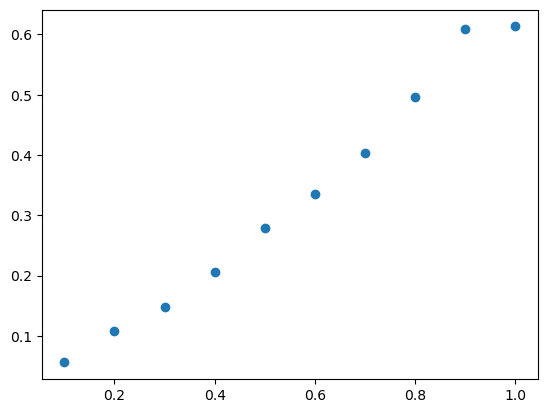

In [23]:
import matplotlib.pyplot as plt
import numpy as np
times = []
for i in np.linspace(0.1, 1, 10):

    begin = time.time()
    _, invs = count_num_inversions(arr[0:int(len(arr) * i)])
    times.append(time.time() - begin)
plt.scatter(np.linspace(0.1, 1, 10), times)